In [137]:
import numpy as np
import matplotlib.pyplot as plt

Consider a `30x30` pixel gray-scale image, where *each pixel can have an intensity value in [0, 1]*. 
> We may model the image as being generated from a 900 dimensional Gaussian distribution, where each dimension represents a pixel. The mean vector of the Gaussian is 900 dimensional and is determined by the pattern of the image. Assume that the mean of the dimension corresponding to (i, j)th pixel is given by (i+j)/100.  The (900x900) covariance matrix is diagonal with each diagonal element being 0.1. The image is generated by sampling from the 900 dimensional Gaussian distribution.

Use **Gibbs sampling** to generate image samples from this high dimensional distribution. Assume, a 900 dimensional vector with each element being 0.5 ,as the initial state.  You may visualize the sample obtained after every 10 iterations as a 30x30 image. 

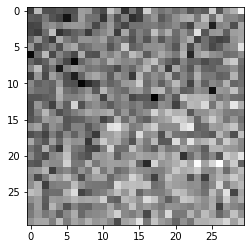

In [138]:
img_dim = 30
img_intensity_range = [0,1]
# Initialize the mean vector and the covariance matrix
mean = np.array([(i+j)/100 for i in range(img_dim) for j in range(img_dim)])
cov = np.diag([0.1]*img_dim**2)
samples = np.random.multivariate_normal(mean, cov, size=1).reshape(img_dim,img_dim)
# Plot the image
plt.imshow(samples, cmap='gray')
plt.show()

In [139]:
def conditional_gaussian(joint_mean, joint_cov, given_idx_val_list, conditional_on):
    dim = len(joint_mean)
    indeces = np.arange(dim)
    given_idx_val_list.pop(conditional_on)
    given = np.fromiter(given_idx_val_list.values(),dtype=float).reshape(dim-1,1)
    
    mean_i = joint_mean[conditional_on].reshape(1,1)
    mean_not_i = joint_mean[np.delete(indeces,conditional_on)].reshape(dim-1,1)
    cov_i_i = joint_cov[conditional_on,conditional_on].reshape(1,1)
    cov_noti_noti = np.delete(joint_cov, conditional_on ,0)
    cov_noti_noti = np.delete(cov_noti_noti, conditional_on ,1).reshape(dim-1,dim-1)
    cov_i_noti = joint_cov[conditional_on,np.delete(indeces,conditional_on)].reshape(1,dim-1)
    cov_noti_i = joint_cov[np.delete(indeces,conditional_on),conditional_on].reshape(dim-1,1)
    
    inv_cov_noti_noti = np.linalg.inv(cov_noti_noti)
    conditional_mean = mean_i + np.dot(np.dot(cov_i_noti, inv_cov_noti_noti), (given-mean_not_i))
    conditional_variance = cov_i_i - np.dot(np.dot(cov_i_noti, inv_cov_noti_noti), cov_noti_i)
    return conditional_mean, conditional_variance

[[0.]]
[[0.1]]
[[0.01]]
[[0.1]]
[[0.02]]
[[0.1]]
[[0.03]]
[[0.1]]
[[0.04]]
[[0.1]]
[[0.05]]
[[0.1]]
[[0.06]]
[[0.1]]
[[0.07]]
[[0.1]]
[[0.08]]
[[0.1]]
[[0.09]]
[[0.1]]
[[0.1]]
[[0.1]]
[[0.11]]
[[0.1]]
[[0.12]]
[[0.1]]
[[0.13]]
[[0.1]]
[[0.14]]
[[0.1]]
[[0.15]]
[[0.1]]
[[0.16]]
[[0.1]]
[[0.17]]
[[0.1]]
[[0.18]]
[[0.1]]
[[0.19]]
[[0.1]]
[[0.2]]
[[0.1]]
[[0.21]]
[[0.1]]
[[0.22]]
[[0.1]]
[[0.23]]
[[0.1]]
[[0.24]]
[[0.1]]
[[0.25]]
[[0.1]]
[[0.26]]
[[0.1]]
[[0.27]]
[[0.1]]
[[0.28]]
[[0.1]]
[[0.29]]
[[0.1]]
[[0.01]]
[[0.1]]
[[0.02]]
[[0.1]]
[[0.03]]
[[0.1]]
[[0.04]]
[[0.1]]
[[0.05]]
[[0.1]]
[[0.06]]
[[0.1]]
[[0.07]]
[[0.1]]
[[0.08]]
[[0.1]]
[[0.09]]
[[0.1]]
[[0.1]]
[[0.1]]
[[0.11]]
[[0.1]]
[[0.12]]
[[0.1]]
[[0.13]]
[[0.1]]
[[0.14]]
[[0.1]]
[[0.15]]
[[0.1]]
[[0.16]]
[[0.1]]
[[0.17]]
[[0.1]]
[[0.18]]
[[0.1]]
[[0.19]]
[[0.1]]
[[0.2]]
[[0.1]]
[[0.21]]
[[0.1]]
[[0.22]]
[[0.1]]
[[0.23]]
[[0.1]]
[[0.24]]
[[0.1]]
[[0.25]]
[[0.1]]
[[0.26]]
[[0.1]]
[[0.27]]
[[0.1]]
[[0.28]]
[[0.1]]
[[0.29]]
[[0.1]]
[[0

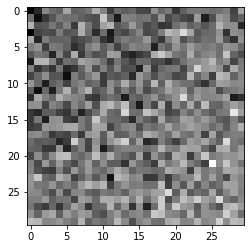

In [140]:
x0 = 0.5*np.ones(img_dim**2)
given_idx_val_list = {i:x0[i-1] for i in range(0,img_dim**2)}
def gibbs_sampler(joint_mean, joint_cov, given_idx_val_list):
    gibbs_sample = np.empty([img_dim**2])
    for i in range(img_dim**2):
        condi_mean,condi_var = conditional_gaussian(joint_mean, joint_cov, given_idx_val_list, i)
        gibbs_sample[i] = np.random.multivariate_normal(condi_mean.ravel(),condi_var,1)
        given_idx_val_list[i] = gibbs_sample[i]
    return gibbs_sample

for i in range(10):
    np.log
    samples = gibbs_sampler(mean,cov,given_idx_val_list)

# Plot the image
plt.imshow(samples.reshape(img_dim,img_dim), cmap='gray')
plt.show()